In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('data/Postings_01052019_15052019.csv', sep=';')
df2 = pd.read_csv('data/Postings_16052019_31052019.csv', sep=';')

df3 = pd.read_csv('data/Votes_01052019_15052019.csv', sep=';')
df4 = pd.read_csv('data/Votes_16052019_31052019.csv', sep=';')

df_postings = pd.concat([df1, df2], ignore_index=True)
df_votes = pd.concat([df3, df4], ignore_index=True)

In [3]:
slice = None
df_postings = df_postings[:slice]
df_votes = df_votes[:slice]

In [4]:
from utils.graphs import graph_user_user_weighted_votes

G = graph_user_user_weighted_votes(votes=df_votes, postings=df_postings, slice=500)

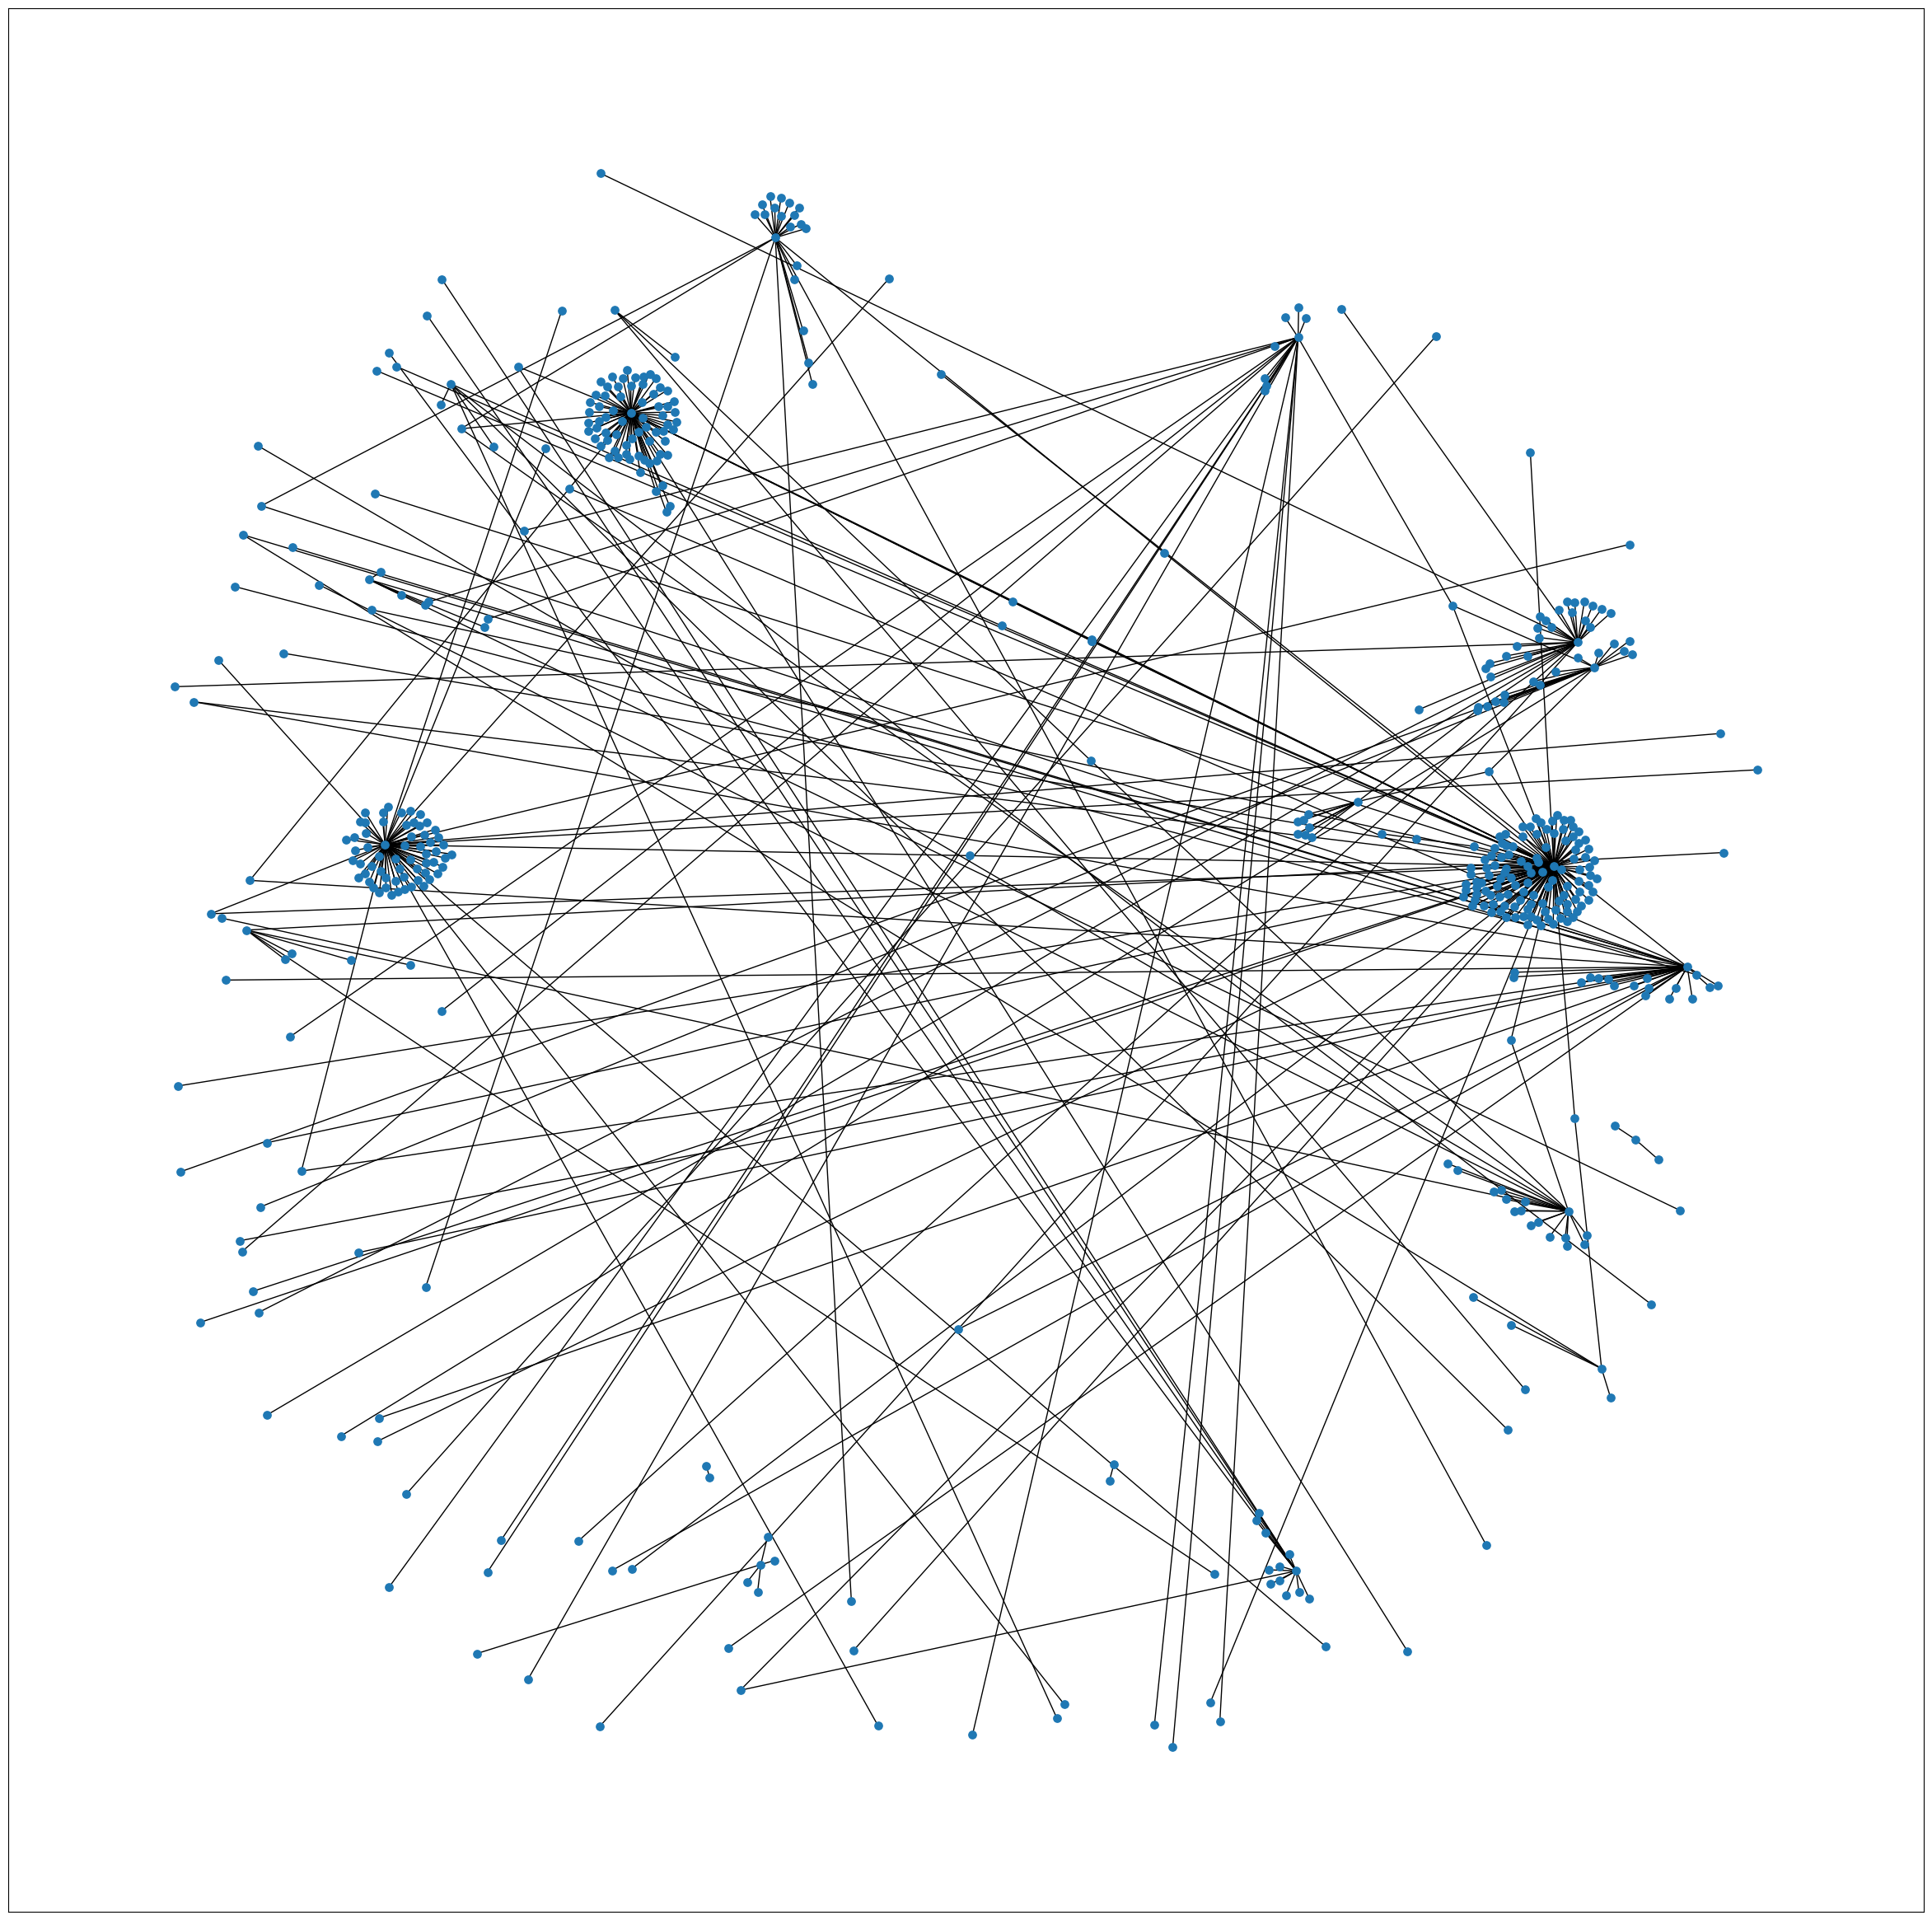

In [5]:
fig = plt.figure(figsize=(30,30))
nx.draw_networkx(G, with_labels=False, node_size=45)
plt.show()

In [6]:
from utils.methods import equivalence_pipeline

equivalence_pipeline(G)

PowerIterationFailedConvergence: (PowerIterationFailedConvergence(...), 'power iteration failed to converge within 100 iterations')